In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import types

In [30]:
from pyspark.sql import functions as F

In [2]:
spark = SparkSession.builder \
    .master("local[*]") \
    .appName('test') \
    .getOrCreate()

25/03/09 00:59:20 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


# Module 5 Homework

In this homework we'll put what we learned about Spark in practice.

For this homework we will be using the Yellow 2024-10 data from the official website:

```bash
wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-10.parquet
```

## Question 1: Install Spark and PySpark

Install Spark
Run PySpark
Create a local spark session
Execute spark.version.
What's the output?

In [3]:
spark.version

'3.3.2'

## Question 2: Yellow October 2024

Read the October 2024 Yellow into a Spark Dataframe.

Repartition the Dataframe to 4 partitions and save it to parquet.

What is the average size of the Parquet (ending with .parquet extension) Files that were created (in MB)? Select the answer which most closely matches.

* 6MB
* 25MB
* 75MB
* 100MB


In [5]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-10.parquet

--2025-03-09 00:31:20--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-10.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 3.160.226.228, 3.160.226.85, 3.160.226.111, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|3.160.226.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64346071 (61M) [binary/octet-stream]
Saving to: ‘yellow_tripdata_2024-10.parquet’

yellow_tripdata_202 100%[===================>]  61.36M  48.8MB/s    in 1.3s    

2025-03-09 00:31:22 (48.8 MB/s) - ‘yellow_tripdata_2024-10.parquet’ saved [64346071/64346071]



In [5]:
!ls -lh

total 62M
-rw-rw-r-- 1 1000 1000 6.4K Mar  9 00:30 03_test.ipynb
-rw-rw-r-- 1 1000 1000  21K Mar  9 01:00 homework.ipynb
-rw-r--r-- 1 root root  62M Dec 18 21:21 yellow_tripdata_2024-10.parquet


In [6]:
df = spark.read \
     .parquet('yellow_tripdata_2024-10.parquet')


In [13]:
# Get the list of column names
columns = df.columns

# Print the column names
print("Columns in the Parquet file:")
print(columns)

Columns in the Parquet file:
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [7]:
df.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2024-10-01 00:30:44|  2024-10-01 00:48:26|              1|          3.0|         1|                 N|         162|         246|           1|       18.4|  1.0|    0.5|       1.

Repartition the DataFrame to 4 Partitions: Next, you'd repartition the DataFrame into 4 partitions:

In [8]:
df_repartitioned = df.repartition(4)

Save the DataFrame to Parquet: Then, you can save the DataFrame back to Parquet format:

In [9]:
df_repartitioned.write.parquet("yellow_tripdata_2024-10_repartitioned.parquet")


Check the Size of the Parquet Files: To estimate the average size of the Parquet files that were created after saving, you can inspect the directory:

In [11]:
!du -sh yellow_tripdata_2024-10_repartitioned.parquet/*

0	yellow_tripdata_2024-10_repartitioned.parquet/_SUCCESS
25M	yellow_tripdata_2024-10_repartitioned.parquet/part-00000-2d9814a1-c7df-4baa-b4d7-7959f4327abf-c000.snappy.parquet
25M	yellow_tripdata_2024-10_repartitioned.parquet/part-00001-2d9814a1-c7df-4baa-b4d7-7959f4327abf-c000.snappy.parquet
25M	yellow_tripdata_2024-10_repartitioned.parquet/part-00002-2d9814a1-c7df-4baa-b4d7-7959f4327abf-c000.snappy.parquet
25M	yellow_tripdata_2024-10_repartitioned.parquet/part-00003-2d9814a1-c7df-4baa-b4d7-7959f4327abf-c000.snappy.parquet


What is the average size of the Parquet (ending with .parquet extension) Files that were created (in MB)? Select the answer which most closely matches.

* 6MB
* **25MB &larr;**
* 75MB
* 100MB

## Question 3: Count records

How many taxi trips were there on the 15th of October?

Consider only trips that started on the 15th of October.

* 85,567
* 105,567
* 125,567
* 145,567

In [26]:
df.registerTempTable('yellow_2024_10')

/opt/spark/python/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [14]:
from pyspark.sql.functions import col, to_date

# Filter the DataFrame for trips starting on 2024-10-15
oct_15_trips = df.filter(to_date(col("tpep_pickup_datetime")) == "2024-10-15")

# Count the number of trips
num_trips_oct_15 = oct_15_trips.count()

# Print the result
print(f"Number of taxi trips on October 15th, 2024: {num_trips_oct_15}")

Number of taxi trips on October 15th, 2024: 128893


In [42]:
df \
    .withColumn('pickup_date', F.to_date(df.tpep_pickup_datetime)) \
    .filter("pickup_date = '2024-10-15'") \
    .count()

128893

Consider only trips that started on the 15th of October.

* 85,567 
* 105,567
* **125,567  &larr;**
* 145,567

## Question 4: Longest trip

What is the length of the longest trip in the dataset in hours?

* 122
* 142
* 162
* 182

In [16]:
from pyspark.sql.functions import col, unix_timestamp

# Calculate the trip duration in seconds
df_with_duration = df.withColumn("trip_duration_seconds", 
                                 (unix_timestamp("tpep_dropoff_datetime") - unix_timestamp("tpep_pickup_datetime")))

# Convert the duration from seconds to hours
df_with_duration = df_with_duration.withColumn("trip_duration_hours", col("trip_duration_seconds") / 3600)

# Find the longest trip (in hours)
longest_trip_hours = df_with_duration.agg({"trip_duration_hours": "max"}).collect()[0][0]

# Print the result
print(f"The length of the longest trip in the dataset is {longest_trip_hours:.2f} hours.")


The length of the longest trip in the dataset is 162.62 hours.


In [32]:
df \
    .withColumn('duration', df.tpep_dropoff_datetime.cast('long') - df.tpep_pickup_datetime.cast('long')) \
    .withColumn("duration", col("duration") / 3600) \
    .withColumn('pickup_date', F.to_date(df.tpep_pickup_datetime)) \
    .groupBy('pickup_date') \
        .max('duration') \
    .orderBy('max(duration)', ascending=False) \
    .limit(5) \
    .show()

+-----------+------------------+
|pickup_date|     max(duration)|
+-----------+------------------+
| 2024-10-16|162.61777777777777|
| 2024-10-03|           143.325|
| 2024-10-22|137.76055555555556|
| 2024-10-18|114.83472222222223|
| 2024-10-21| 89.89833333333333|
+-----------+------------------+



What is the length of the longest trip in the dataset in hours?

* 122
* 142
* **162 &larr;**
* 182

## Question 5: User Interface

Spark’s User Interface which shows the application's dashboard runs on which local port?

* 80
* 443
* **4040  &larr;**
* 8080

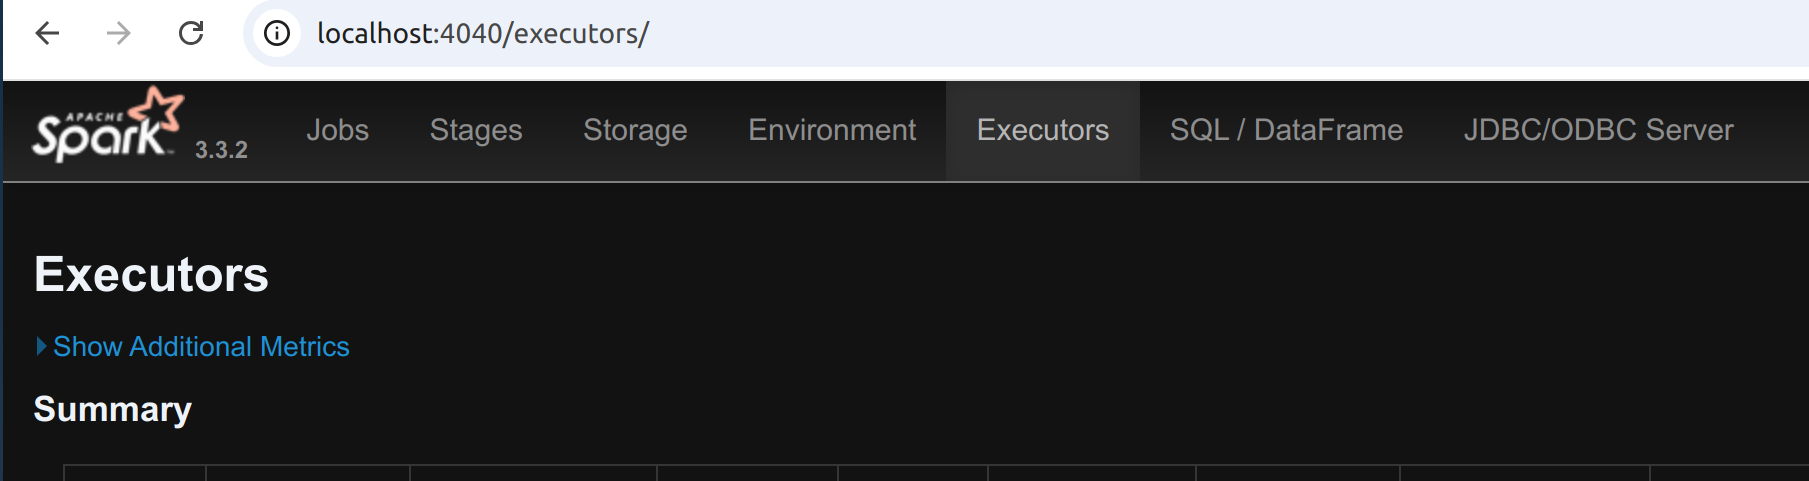

# Question 6: Least frequent pickup location zone

Load the zone lookup data into a temp view in Spark:

```bash
wget https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv
```

Using the zone lookup data and the Yellow October 2024 data, what is the name of the LEAST frequent pickup location Zone?

* Governor's Island/Ellis Island/Liberty Island
* Arden Heights
* Rikers Island
* Jamaica Bay

In [19]:
!wget https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv

--2025-03-09 01:21:07--  https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 3.160.226.85, 3.160.226.161, 3.160.226.228, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|3.160.226.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12331 (12K) [text/csv]
Saving to: ‘taxi_zone_lookup.csv’

taxi_zone_lookup.cs 100%[===================>]  12.04K  --.-KB/s    in 0s      

2025-03-09 01:21:07 (256 MB/s) - ‘taxi_zone_lookup.csv’ saved [12331/12331]



In [21]:
!head -2 taxi_zone_lookup.csv

In [22]:
# Load the Taxi Zone Lookup CSV into a DataFrame
df_zone_lookup = spark.read.option("header", "true").csv("taxi_zone_lookup.csv")

# Register the zone lookup DataFrame as a temporary view
df_zone_lookup.createOrReplaceTempView("zone_lookup")

In [23]:
df_zone_lookup.head(5)

[Row(LocationID='1', Borough='EWR', Zone='Newark Airport', service_zone='EWR'),
 Row(LocationID='2', Borough='Queens', Zone='Jamaica Bay', service_zone='Boro Zone'),
 Row(LocationID='3', Borough='Bronx', Zone='Allerton/Pelham Gardens', service_zone='Boro Zone'),
 Row(LocationID='4', Borough='Manhattan', Zone='Alphabet City', service_zone='Yellow Zone'),
 Row(LocationID='5', Borough='Staten Island', Zone='Arden Heights', service_zone='Boro Zone')]

In [34]:
# Join the Yellow Trip Data with the Zone Lookup Data on PULocationID
df_joined = df.join(df_zone_lookup, df["PULocationID"] == df_zone_lookup["LocationID"])

# Group by the zone name and count the occurrences
df_zone_counts = df_joined.groupBy("Zone").count()

# Find the least frequent pickup location zone
least_frequent_zone = df_zone_counts.orderBy("count").limit(1)

# Show the result
least_frequent_zone.show()

+--------------------+-----+
|                Zone|count|
+--------------------+-----+
|Governor's Island...|    1|
+--------------------+-----+



In [41]:
spark.sql("""
SELECT
    pul.Zone,
    COUNT(1)
FROM 
    yellow_2024_10 yellow JOIN zone_lookup pul ON yellow.PULocationID = pul.LocationID
GROUP BY 
    1
ORDER BY
    2 ASC
LIMIT 5;
""").show()

+--------------------+--------+
|                Zone|count(1)|
+--------------------+--------+
|Governor's Island...|       1|
|       Rikers Island|       2|
|       Arden Heights|       2|
|         Jamaica Bay|       3|
| Green-Wood Cemetery|       3|
+--------------------+--------+



Using the zone lookup data and the Yellow October 2024 data, what is the name of the LEAST frequent pickup location Zone?

* **Governor's Island/Ellis Island/Liberty Island    &larr;**
* Arden Heights
* Rikers Island
* Jamaica Bay